In [1]:
"""
Landon Buell
PHYS 799
Make Spectrogram figures
30 Nov 2020
"""

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import scipy.fftpack as fftpack
import scipy.io.wavfile as sciowav
import scipy.signal as signal

In [2]:
def GetWavFiles():
    """ Get all Wav files in CWD"""
    path = os.getcwd()
    wavFiles = []
    files = os.listdir(path)
    for file in files:
        if file.endswith(".wav"):
            wavFiles.append(file)
    return wavFiles

wavFiles = GetWavFiles()
print(wavFiles)

['AltoSax-A4.wav', 'CELLO-F4.wav', 'Clarinet-Gs5.wav', 'FLUTE-Cs6.wav', 'FRENCHHORN-Cs4.wav', 'GUITAR-B2.wav', 'Oboe.Bb4.R.wav', 'SawtoothWave-220.wav', 'SineWave-220.wav', 'SquareWave-220.wav', 'TriangleWave-220.wav', 'Trumpet-B3.wav', 'Tuba-A2.wav', 'Viola-G4.wav', 'Violin-G4.wav', 'WhiteNoise-190.wav']


In [65]:
def CenterOfMass(x):
    """ Compute Center of Mass of x """
    x = np.abs(x)
    _weights = np.arange(len(x))
    _sum = np.sum(x)
    return np.dot(_weights,x)/_sum


In [69]:
def PlotTimeSpectrum (X,Z,namesave):
    """ Plot 1D Spectrum """
    plt.figure(figsize=(16,6))
    plt.xlabel("Time [Samples]",size=40,weight='bold')
    plt.ylabel("Amplitude",size=40,weight='bold')
    
    plt.plot(np.arange(len(X)),X,color='blue',label="Waveform")
    plt.plot(Z,0.1,color='red',marker="o",markersize=20,label='Temporal Center of Mass')
    
    plt.xlim(0,len(X))
    
    plt.hlines(0,0,len(X),color='black')
    plt.vlines(0,0,1,color='black')
    plt.grid()
    plt.legend(fontsize=20)
    plt.tight_layout()
    
    plt.savefig(namesave+"_TCM.png")
    plt.show()
    

CELLO-F4.wav
45473.706577944315


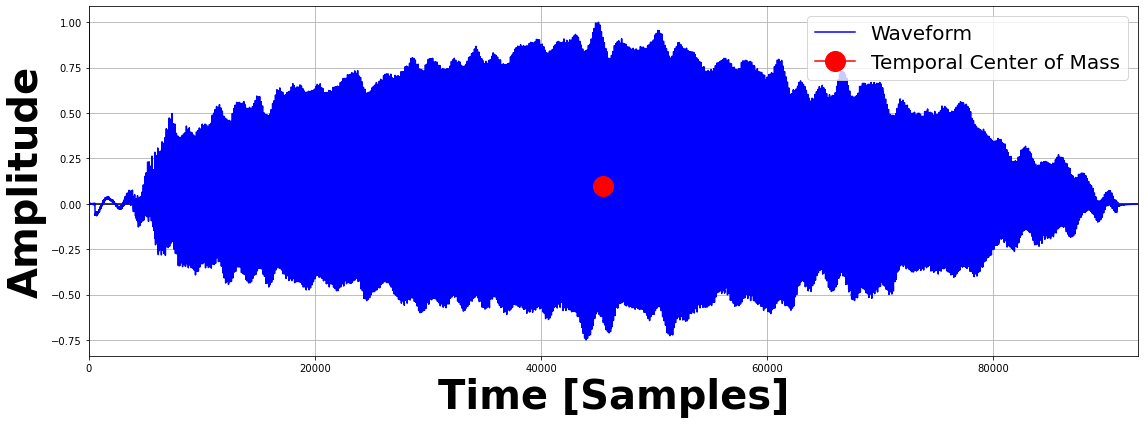

In [70]:
file = wavFiles[1]
print(file)
rate,waveform = sciowav.read(file) 
waveform = waveform / np.max(np.abs(waveform))
_com = CenterOfMass(waveform)
print(_com)
PlotTimeSpectrum(waveform,_com,file)

GUITAR-B2.wav
72024.99504088907


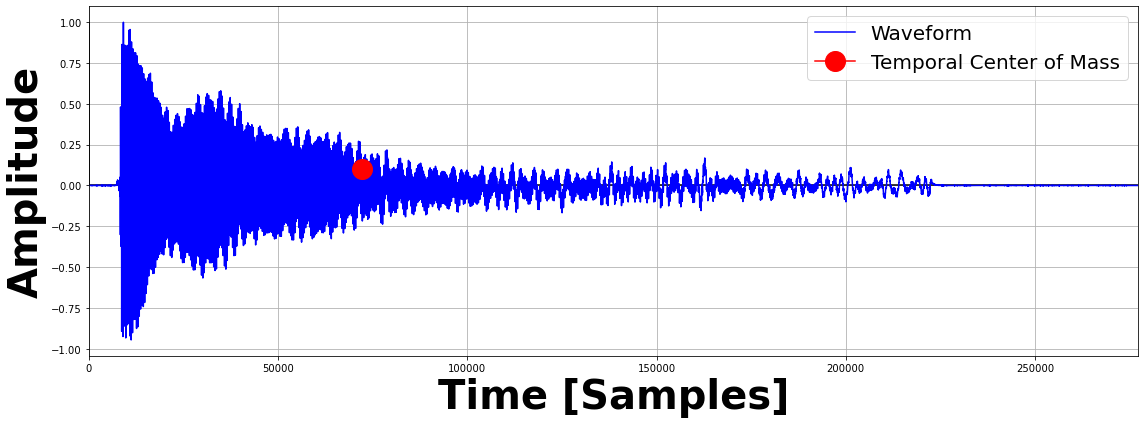

In [71]:
file = wavFiles[5]
print(file)
rate,waveform = sciowav.read(file) 
waveform = waveform / np.max(np.abs(waveform))
_com = CenterOfMass(waveform)
print(_com)
PlotTimeSpectrum(waveform,_com,file)

In [94]:
def PlotFreqSpectrum (X,Y,Z,namesave):
    """ Plot 1D Spectrum """
    plt.figure(figsize=(16,6))
    plt.xlabel("Frequency [Hz]",size=40,weight='bold')
    plt.ylabel("Amplitude",size=40,weight='bold')
    
    plt.plot(X,Y,color='blue',label="Spectrum")
    plt.plot(Z,0.1,color='red',marker="o",markersize=20,label='Frequency Center of Mass')
    
    
    plt.hlines(0,0,len(X),color='black')
    plt.vlines(0,0,1,color='black')
    plt.grid()
    plt.legend(fontsize=20)
    plt.tight_layout()
    
    plt.savefig(namesave+"_FCM.png")
    plt.show()
    
frameSize = 1024

CELLO-F4.wav
(558,)


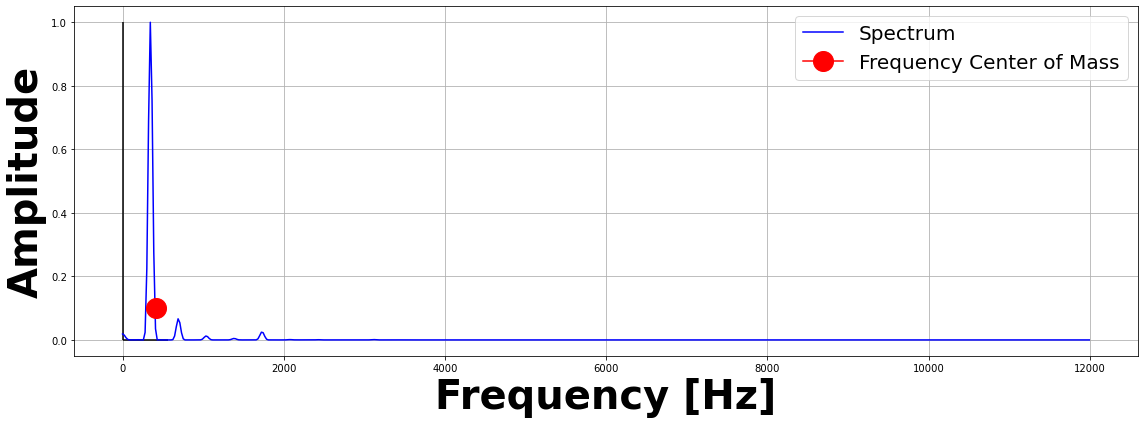

In [97]:
file = wavFiles[1]
print(file)
rate,waveform = sciowav.read(file) 

st= int(2**14)
_slice = waveform[st:st+frameSize]
_slice = _slice * signal.windows.hann(frameSize)
_slice = np.append(_slice,np.zeros(frameSize))


_hertz = fftpack.fftfreq(n=2048,d=1/44100)
_spectrum = np.abs(fftpack.fft(_slice))**2
_spectrum = _spectrum / np.max(_spectrum)

pts = np.where((_hertz>=0)&(_hertz<=12000))[0]
print(pts.shape)
_hertz = _hertz[pts]
_spectrum = _spectrum[pts]
#plt.plot(_hertz,_spectrum)

_com = CenterOfMass(_spectrum)
_com = _hertz[int(_com)]
PlotFreqSpectrum(_hertz,_spectrum,_com,file)

Oboe.Bb4.R.wav
(558,)


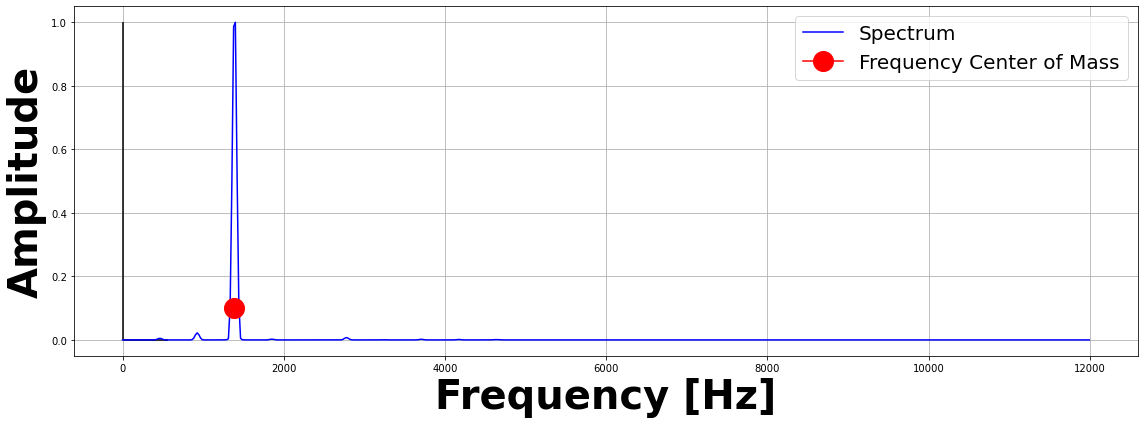

In [101]:
file = wavFiles[6]
print(file)
rate,waveform = sciowav.read(file) 

st= int(2**14)
_slice = waveform[st:st+frameSize]
_slice = _slice * signal.windows.hann(frameSize)
_slice = np.append(_slice,np.zeros(frameSize))


_hertz = fftpack.fftfreq(n=2048,d=1/44100)
_spectrum = np.abs(fftpack.fft(_slice))**2
_spectrum = _spectrum / np.max(_spectrum)

pts = np.where((_hertz>=0)&(_hertz<=12000))[0]
print(pts.shape)
_hertz = _hertz[pts]
_spectrum = _spectrum[pts]
#plt.plot(_hertz,_spectrum)

_com = CenterOfMass(_spectrum)
_com = _hertz[int(_com)]
PlotFreqSpectrum(_hertz,_spectrum,_com,file)